<a href="https://colab.research.google.com/github/Mohd-Saif-IITB/Python-for-Oil-Gas/blob/main/Production_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**For more visit:** https://github.com/yohanesnuwara

**First of all we will import all the python libraries which we need here**

In [1]:
import numpy as np # it is numerical package for mathematical calculations
import pandas as pd # it is data processing package and u may call it excel of python
import matplotlib.pyplot as plt # it is plotting library-graps,histograms,contour maps etc.
import seaborn as sns # for greater visualizations
import missingno as msno # to inspect if there are any missing numbers/values in your data

**Load and view Data**

In [47]:
filepath="https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/Volve%20production%20analysis%20data.csv"# directly from website
#filepath="/content/python data.txt"# can also do it from local disk you can upload to session storage of google colab and copy-paste its path here
df=pd.read_csv(filepath) # our file is in csv format
df
#df.head(10)# to see first 10 data
#df.tail(10)# to see last 10 data


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,15-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,16-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,17-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


Feature is the column of our data

Observation is the row of our data


**Converting datetime column to pandas datetime format(y-d-m)**

we see the dates in our data is in d-m-y so we type (%d-%b-%y), month is in abbreviation (b)

help(pd.to_datetime)

In [4]:
df["DATEPRD"]=pd.to_datetime(df["DATEPRD"],format="%d-%b-%y") #this is very important before working on ur data
df # date will be converted into year-month-day

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,2016-09-17,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [5]:
print(df.columns)# print all columns/features to see what is there in our dataset

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')


In [6]:
df["NPD_WELL_BORE_NAME"]# gives all names in that column, names may repeat(not-unique)

0        15/9-F-1 C
1        15/9-F-1 C
2        15/9-F-1 C
3        15/9-F-1 C
4        15/9-F-1 C
            ...    
15629      15/9-F-5
15630      15/9-F-5
15631      15/9-F-5
15632      15/9-F-5
15633      15/9-F-5
Name: NPD_WELL_BORE_NAME, Length: 15634, dtype: object

In [8]:
print(df["NPD_WELL_BORE_NAME"].unique())# unique names will be given

['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']


**Lets say we want to work on well 15/9-F-14 so we need to separate it from dataframe**

In [9]:
mask=df['NPD_WELL_BORE_NAME']=="15/9-F-14" # this will exact match with dataframe and gives data only for selected well name 15/9-F-14
well14_df=df[mask]
well14_df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


**Display Summary Statistics of data**

In [10]:
well14_df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056.000000,3050.000000,3050.000000,3050.000000,2533.000000,2860.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,20.541194,233.074651,95.133791,192.653088,10.527985,69.390287,41.530601,77.103033,15.435755,1290.009817,189139.247382,2330.245746,NaN
std,7.881136,64.923765,25.846814,57.736987,9.704603,31.064576,22.719575,25.615707,19.965158,1298.363790,184204.112292,1462.922870,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,NaN
25%,24.000000,237.493000,99.621000,180.749500,0.000000,43.014158,31.020500,81.223500,2.665500,210.000000,31303.750000,695.500000,NaN
50%,24.000000,246.776000,101.007500,204.247500,12.969000,71.012955,33.546000,86.963500,7.177500,881.000000,142363.000000,2965.500000,NaN
75%,24.000000,261.971250,105.049000,229.632750,21.232000,100.000000,49.080250,88.539000,21.174000,2033.500000,305328.000000,3444.250000,NaN
max,25.000000,334.656000,106.773000,302.110000,26.682000,100.000000,125.719000,93.510000,125.719000,5644.000000,789975.000000,5692.000000,NaN


**Plot water and oil production(use step);BORE_WAT_VOL, BORE_OIL_VOL**

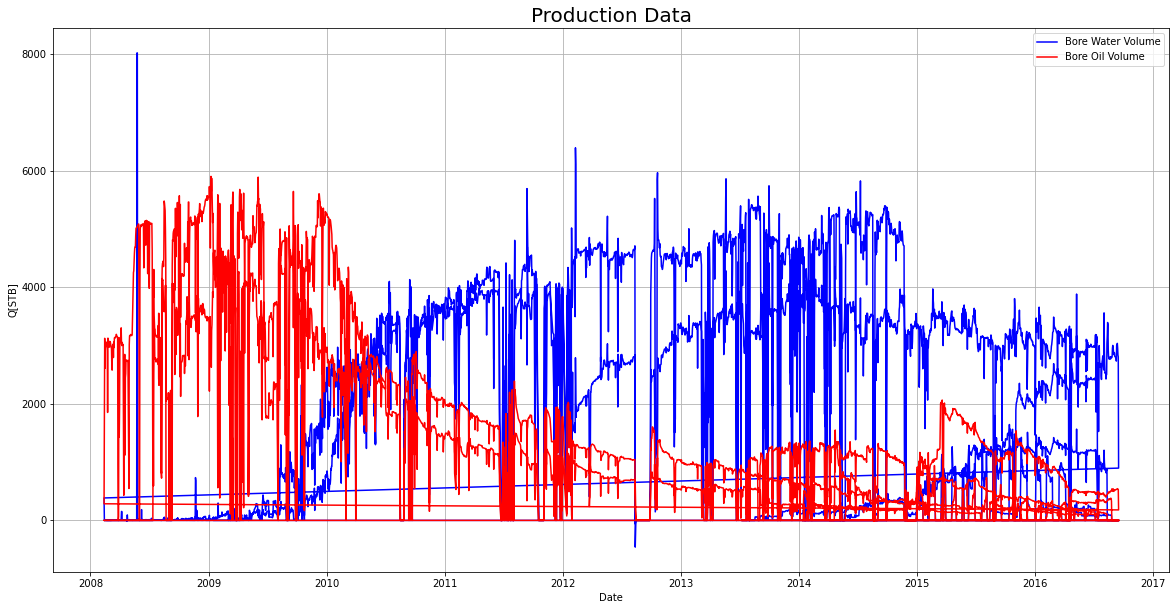

In [13]:
plt.figure(figsize=(20,10)) # controls how big your plot is

plt.plot(df['DATEPRD'],df['BORE_WAT_VOL'],color='blue',label='Bore Water Volume')
plt.plot(df['DATEPRD'],df['BORE_OIL_VOL'],color='red',label='Bore Oil Volume')

plt.title("Production Data",size=20)
plt.grid()
plt.legend() # if you forget this your label will not be shown

plt.xlabel("Date")
plt.ylabel("Q[STB]")#cumulative production in standard barrel

plt.show() # we can clearly see between 2010 and 2011 water production starts to increase

**Produce Histogram of Data(use subplots)**

Histogram reveals the distribution of ur data

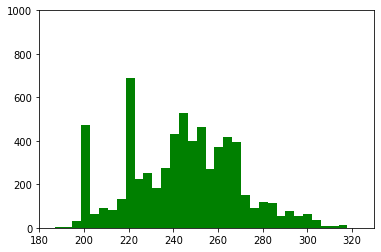

In [28]:
plt.hist(df['AVG_ANNULUS_PRESS'],color='red')
plt.hist(df['AVG_DOWNHOLE_PRESSURE'],color='green',bins=100)#increase bins to decrease width of histogram

plt.xlim(180,330)# that one which is separated from all others are outliers, remove xlimit to see it
plt.ylim(0,1000)

# plt.xlim(0,40)
# plt.ylim(0,3000) # make above two codes as comment by putting # in front and remove # from these two to see

plt.show()

**Make pairplot b/w features using Seaborn**

In pairplot more than 2 variables can be plotted. We can see correlation b/w them and clusters of data. It also produces histogram in it for each features

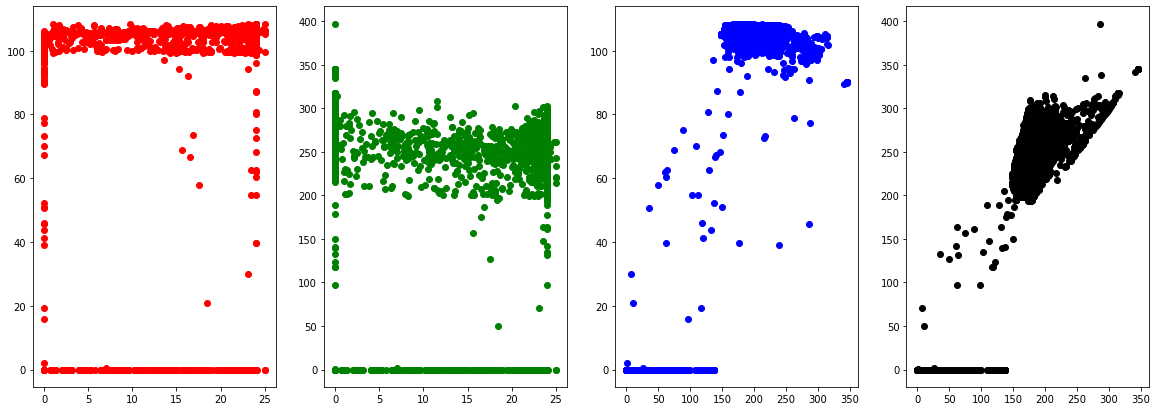

In [34]:
plt.figure(figsize=(20,7))

plt.subplot(141) # 121 means in table of 1 row and 2 columns plot in 1st
plt.scatter(df['ON_STREAM_HRS'],df['AVG_DOWNHOLE_TEMPERATURE'],color='r') # r or red

plt.subplot(142)
plt.scatter(df['ON_STREAM_HRS'],df['AVG_DOWNHOLE_PRESSURE'],color='g') # g or green

plt.subplot(143)
plt.scatter(df['AVG_DP_TUBING'],df['AVG_DOWNHOLE_TEMPERATURE'],color='b') # b or blue
plt.subplot(144)
plt.scatter(df['AVG_DP_TUBING'],df['AVG_DOWNHOLE_PRESSURE'],color='k') # k or black

plt.show()

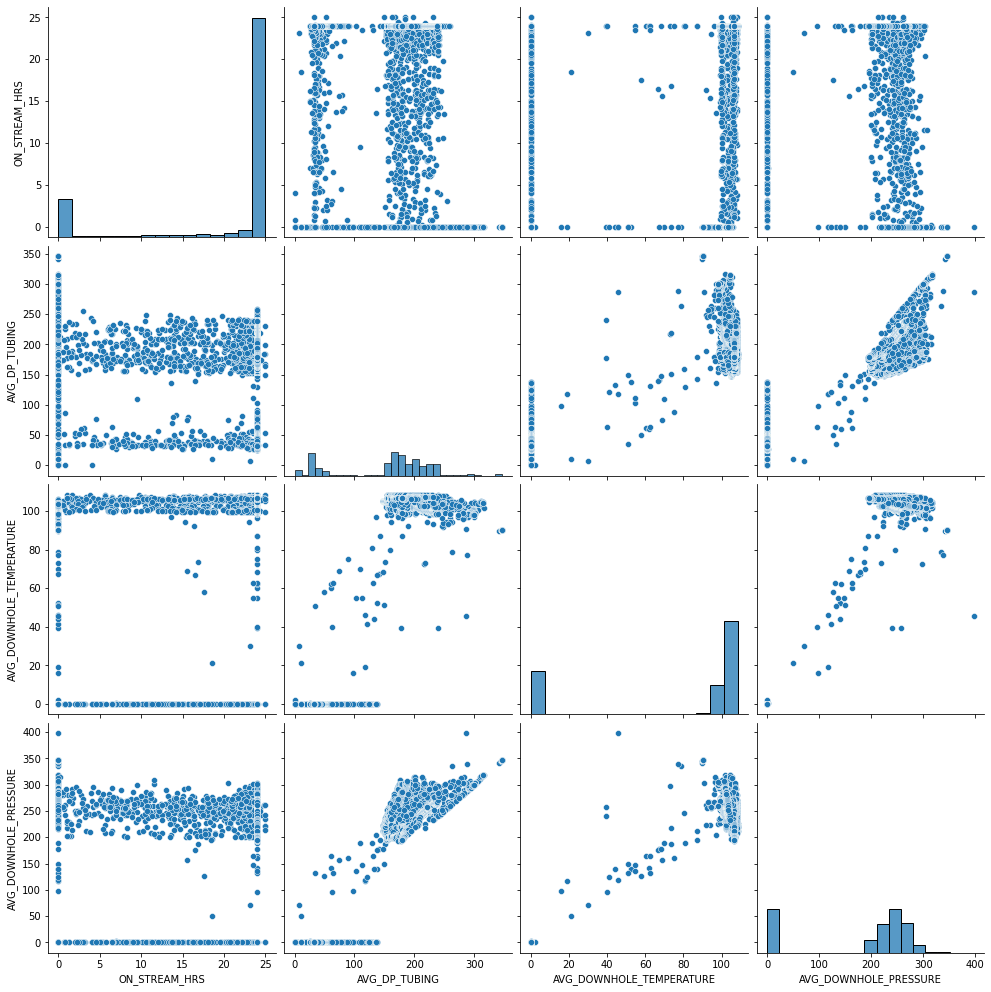

In [40]:
# we have used matplotlib above, now we use seaborn to see the difference

lists=['ON_STREAM_HRS','AVG_DP_TUBING','AVG_DOWNHOLE_TEMPERATURE','AVG_DOWNHOLE_PRESSURE']
input=df[lists]

sns.pairplot(input,height=3.5) # it may take time to run

**Visualizing Missing Values(non-numeric)in data using Missingno**

White space means missing values

Black is our data

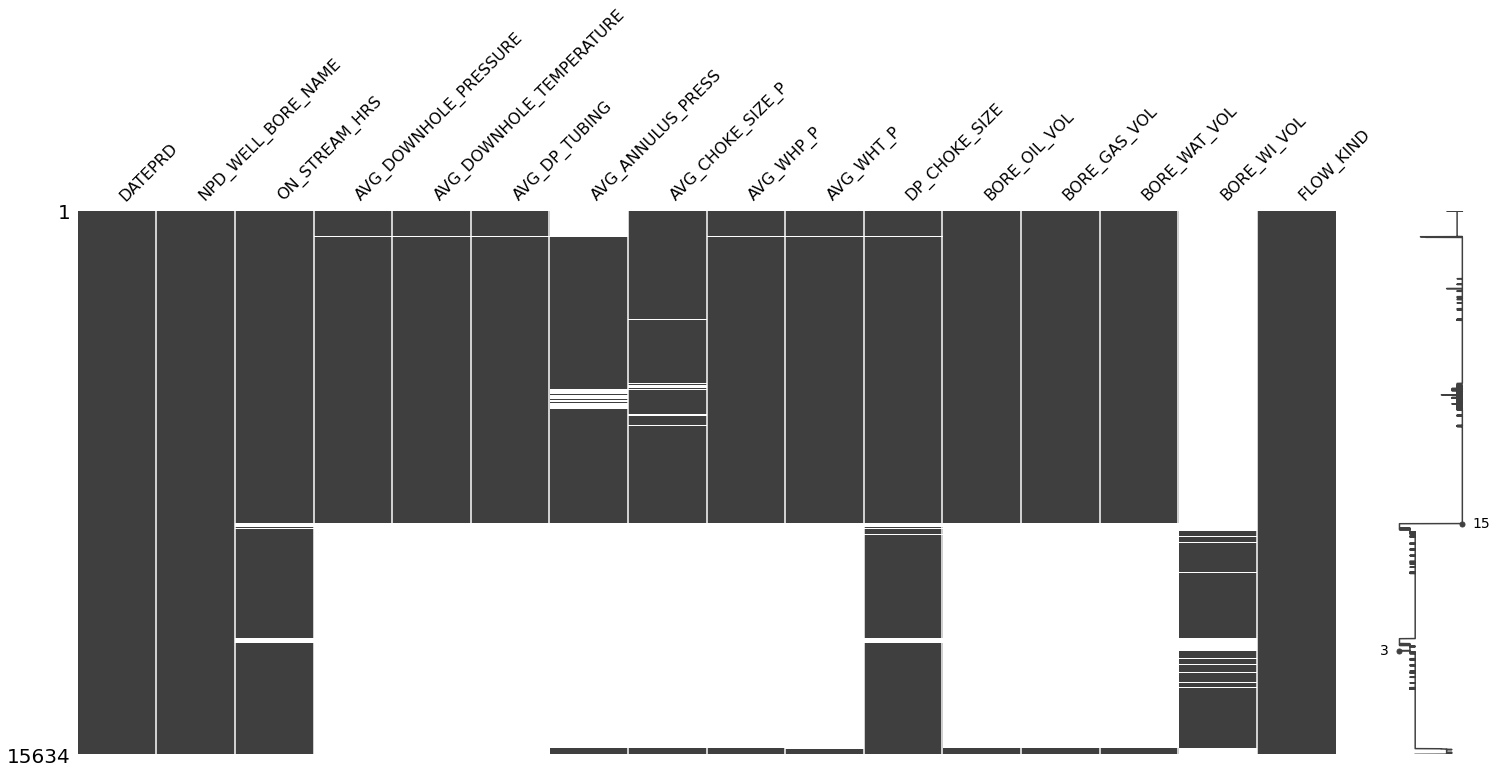

In [41]:
msno.matrix(df)

**Interpolation to fill missing values**

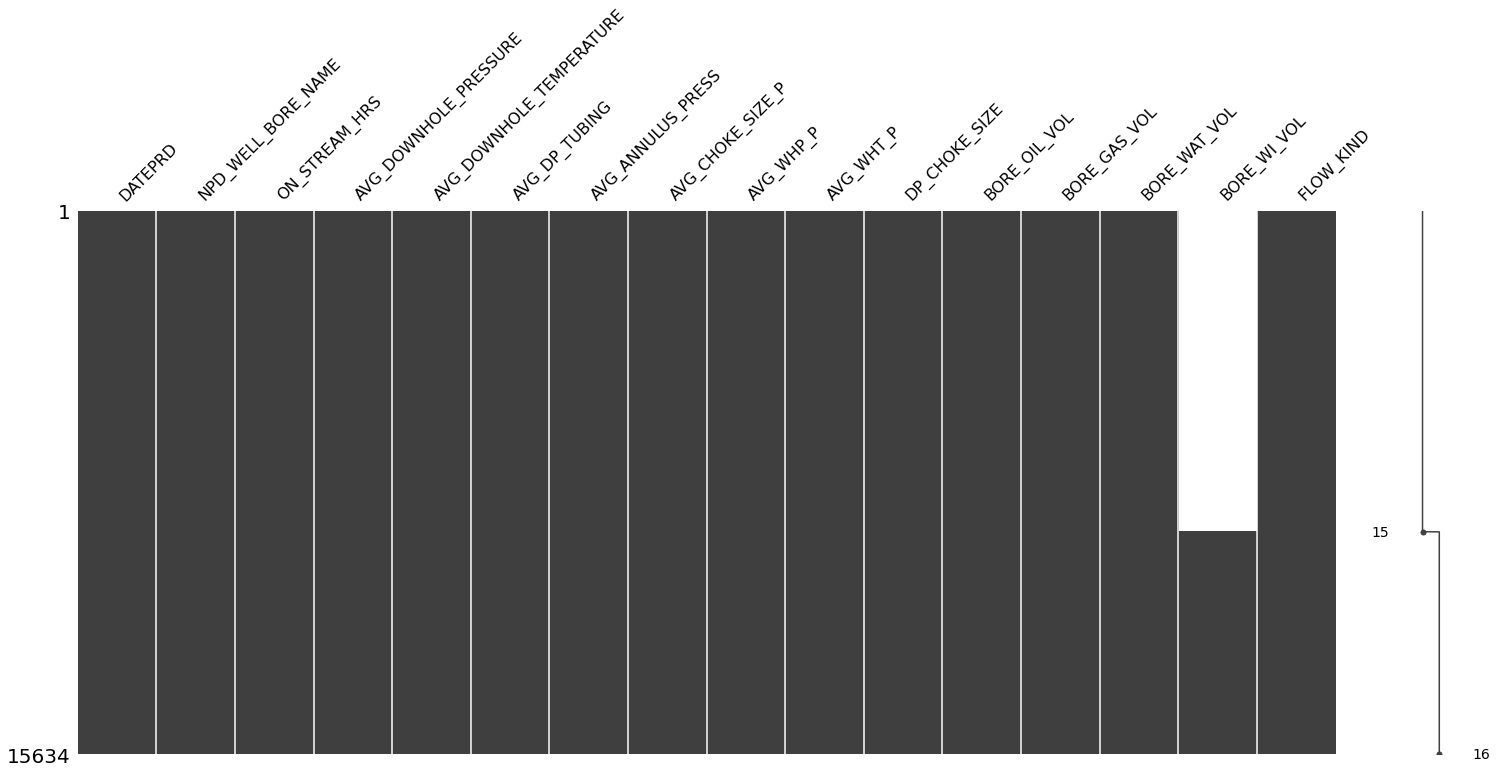

In [48]:
df=df.interpolate(method='linear')
msno.matrix(df) # now we can see white missing data is filled